# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

--2021-03-21 23:47:21--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: ‘lut.py’

lut.py              100%[===================>]  10.09K  --.-KB/s    in 0s      

2021-03-21 23:47:21 (86.8 MB/s) - ‘lut.py’ saved [10330/10330]



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

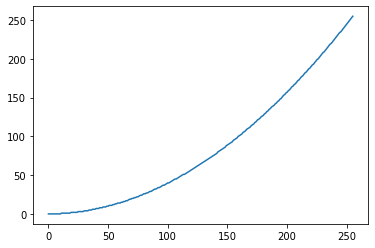

In [3]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

--2021-03-21 23:47:21--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘lena.bmp’

lena.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.01s   

2021-03-21 23:47:22 (5.47 MB/s) - ‘lena.bmp’ saved [66616/66616]

--2021-03-21 23:47:22--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘jet.bmp

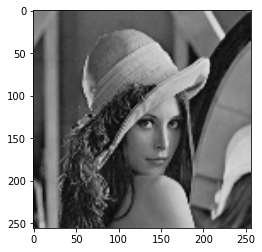

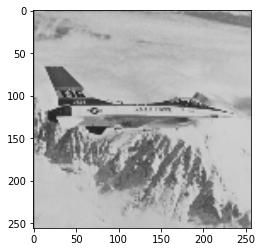

In [4]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

lena = cv2.imread("lena.bmp")
jet = cv2.imread("jet.bmp")
plt.figure()
plt.imshow(lena)
plt.figure()
plt.imshow(jet)
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

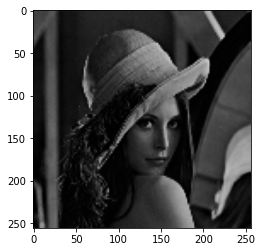

In [5]:
lut_img = cv2.LUT(lena, lut.kwadratowa)

plt.imshow(lut_img)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(image, table):
  edited_image = cv2.LUT(image, table)
  f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 5))
  ax1.set_aspect('equal')
  ax1.set_title("table")
  ax2.set_title("original")
  ax3.set_title("edited")

  ax1.plot(table)
  ax2.imshow(image)
  ax3.imshow(edited_image)

  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

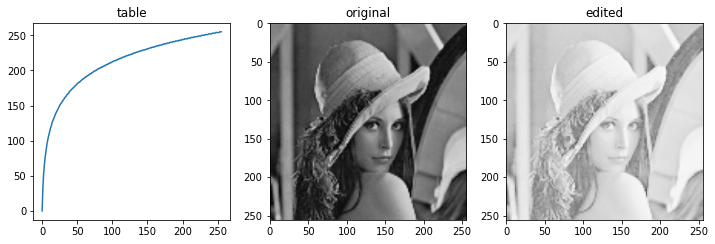

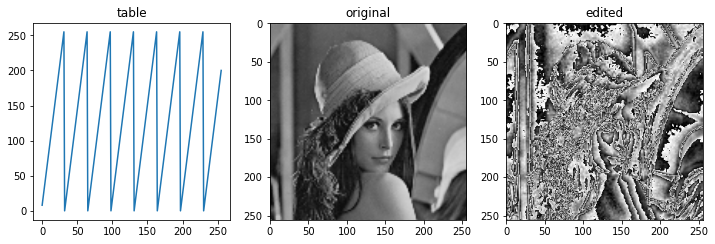

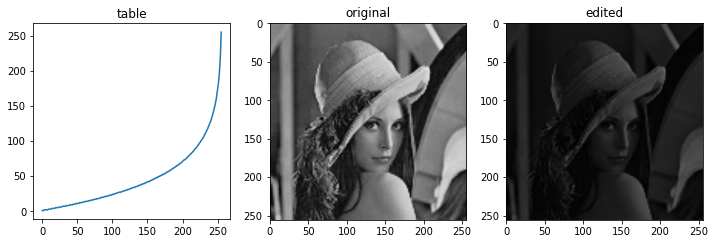

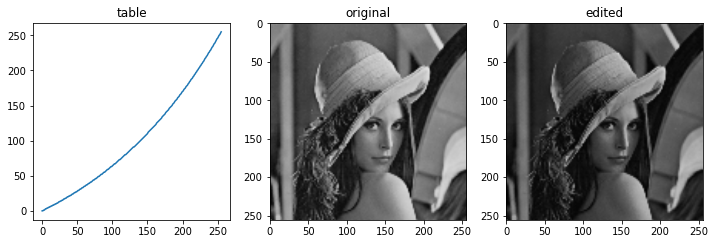

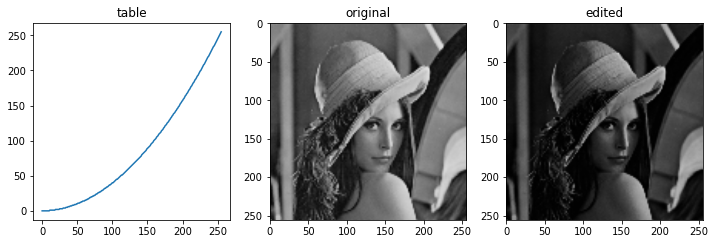

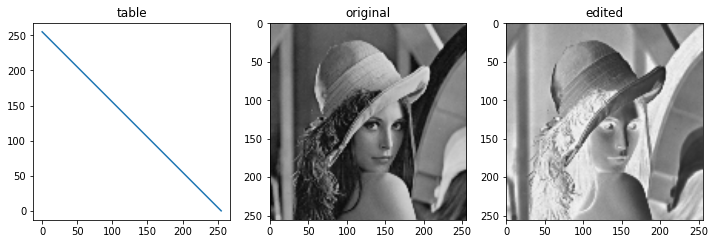

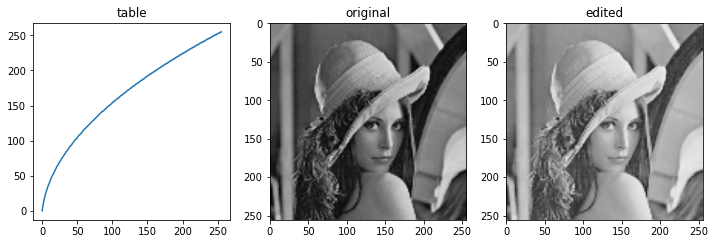

In [7]:
for table in [lut.log, lut.pila, lut.odwlog, lut.wykladnicza, lut.kwadratowa, lut.odwrotna, lut.pierwiastkowa]:
  LUT(lena, table)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

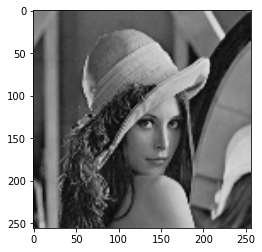

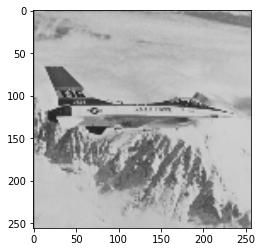

In [8]:
plt.figure()
plt.imshow(lena)
plt.show()

plt.figure()
plt.imshow(jet)
plt.show()


Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

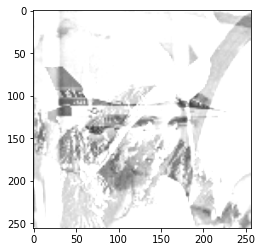

In [9]:
sum_img = cv2.add(lena, jet)

plt.imshow(sum_img)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

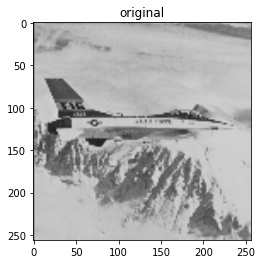

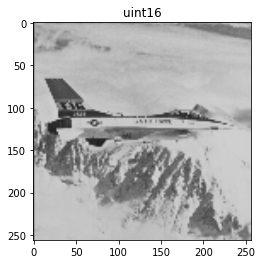

In [10]:
jet_uint16 = jet.astype('uint16')

plt.figure()
plt.title("original")
plt.imshow(jet)
plt.show()

plt.figure()
plt.title("uint16")
plt.imshow(jet_uint16)
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

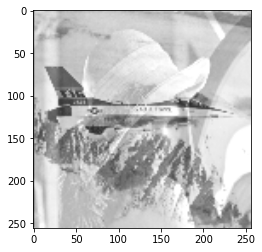

In [11]:
addWeighted_img = cv2.addWeighted(lena, 0.4, jet, 0.9, 0)

plt.imshow(addWeighted_img)
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

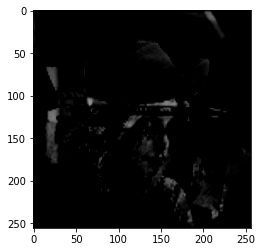

In [12]:
img_sub = cv2.subtract(lena, jet)

plt.imshow(img_sub)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

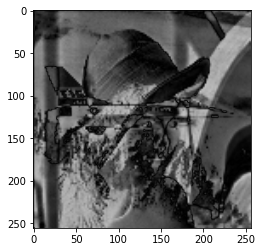

In [13]:
lena_int16 = lena.astype('int16')
jet_int16 = jet.astype('int16')


img_sub2 = np.abs(cv2.subtract(lena_int16, jet_int16))
plt.imshow(img_sub2)
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

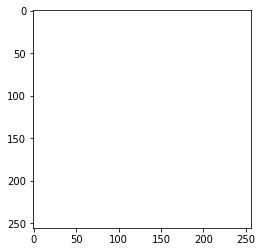

In [14]:
mul_img = cv2.multiply(lena, jet)

plt.imshow(mul_img)
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

--2021-03-21 23:47:28--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kolo.bmp’

kolo.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.01s   

2021-03-21 23:47:29 (5.57 MB/s) - ‘kolo.bmp’ saved [66614/66614]



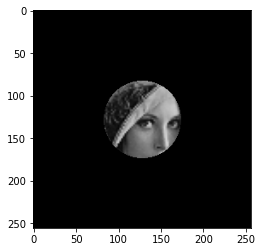

In [15]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

kolo  = cv2.imread("kolo.bmp").astype('bool').astype('uint8')

circle_mask_result = cv2.multiply(lena, kolo)
plt.imshow(circle_mask_result)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

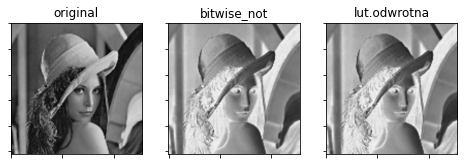

In [16]:
neg1 = cv2.bitwise_not(lena)
neg2 = cv2.LUT(lena, lut.odwrotna)

f, axs = plt.subplots(1, 3, figsize=(8, 6))
for i, name in enumerate([lena, neg1, neg2]):
  axs[i].imshow(name)
  axs[i].set_xticklabels('')
  axs[i].set_yticklabels('')

for i, label in enumerate(['original', 'bitwise_not', 'lut.odwrotna']):
  axs[i].set_title(label)

plt.show()


## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

--2021-03-21 23:47:29--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kwadrat.bmp’

kwadrat.bmp         100%[===================>]  65.05K  --.-KB/s    in 0.01s   

2021-03-21 23:47:30 (6.03 MB/s) - ‘kwadrat.bmp’ saved [66614/66614]



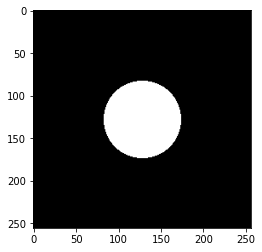

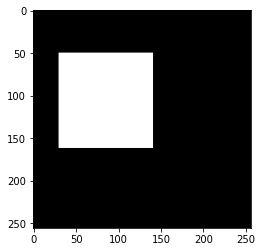

In [17]:
!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

mask_kolo = cv2.imread("kolo.bmp")
mask_kwadrat = cv2.imread("kwadrat.bmp")

plt.imshow(mask_kolo)
plt.figure()
plt.imshow(mask_kwadrat)

plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

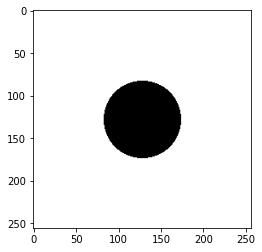

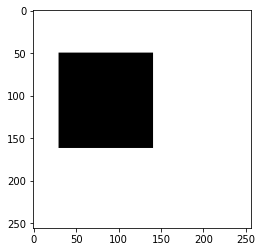

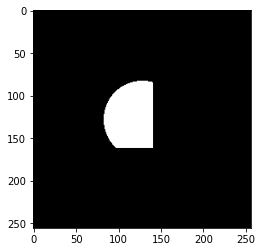

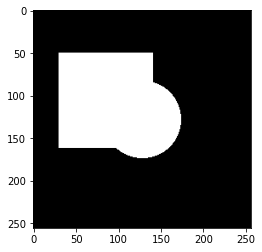

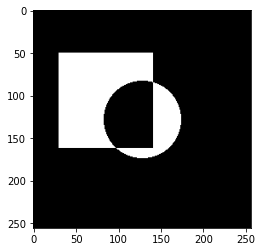

In [18]:
plt.figure()
plt.imshow(~mask_kolo)
plt.figure()
plt.imshow(~mask_kwadrat)
plt.figure()
plt.imshow(mask_kolo&mask_kwadrat)
plt.figure()
plt.imshow(mask_kolo|mask_kwadrat)
plt.figure()
plt.imshow(mask_kolo^mask_kwadrat)
